In [1]:
import numpy as np
from numpy_ringbuffer import RingBuffer

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Digital Frame Synchronization


Header sequence (N=16): [1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1]
Cross correlation: [ 3.  4.  5.  5.  6.  4.  4.  6.  4.  4.  5.  8.  7. 10.  8.  7.  8. 10.
  7.  8.  8.  9. 14. 11.  9. 10. 12.  9. 13.  9.  9. 11. 13.  9. 12. 11.
  9.  9. 13. 10.  9. 11.  9. 14. 12.  9. 10. 11.  8. 11.  6.  9.  8. 11.
  6.  7.  9.  8.  7.  4.  4.  9.  9.  7.  6.  7.  9. 11.  8.  7. 10. 12.
 10. 11. 11. 10.  9. 10.  9.  7. 10.  7.  9.  6.  7.  6.  5.  4.  5.  2.
  4.  3.]
Correlation peak value: 14.0


<StemContainer object of 3 artists>

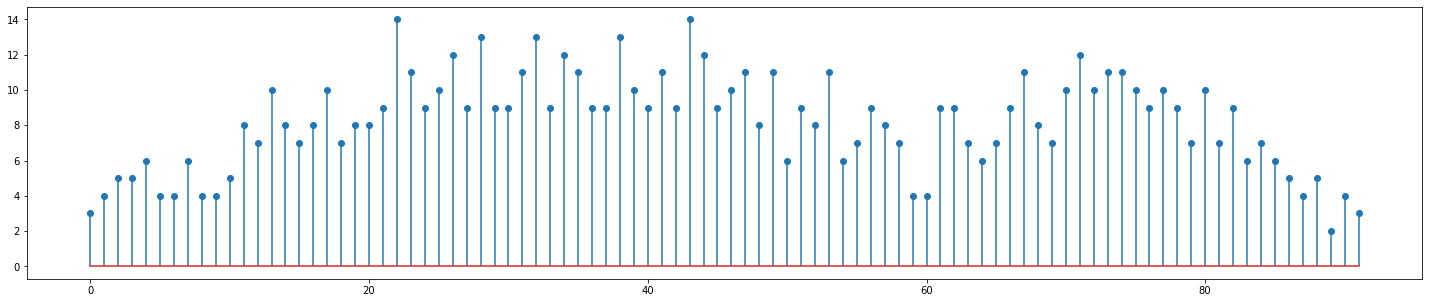

In [2]:
# Create test data
seq = np.array([(0xbeef >> i) & 0x1 for i in range(4 * 4)])
# seq = np.array([1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1])

stream = np.concatenate([
    np.random.randint(low=0, high=2, size=30), seq, np.random.randint(low=0, high=2, size=30)
])

print(f"Header sequence (N={len(seq)}): {seq}")
# print(f"Data stream: {stream}")

# compute cross correlation
def distance(v):
    return len(seq) - sum(np.logical_xor(v, seq))

fifo = RingBuffer(len(seq))
xcorr = RingBuffer(len(stream) + len(seq))

## fill FIFO with zeros
fifo.extend(np.zeros(fifo.maxlen))

for i in range(len(stream) + len(seq)):
    #print(np.array(fifo))
    xcorr.append(distance(np.array(fifo)))
    
    # if the stream is finished use zeros
    fifo.pop()
    if i < len(stream):
        fifo.appendleft(stream[i])
    else:
        fifo.appendleft(0)

print(f"Cross correlation: {np.array(xcorr)}")
print(f"Correlation peak value: {max(np.array(xcorr))}")

plt.figure(figsize = (25, 5))
plt.stem(np.array(xcorr))